In [2]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score
from helper import occlusion, load_dataset
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input, Conv2D, MaxPooling2D, InputLayer, ReLU

%matplotlib inline

In [2]:
! unzip home.zip

Archive:  home.zip
   creating: .config/matplotlib/
   creating: .keras/
  inflating: .keras/keras.json       
   creating: .local/
   creating: .local/share/
   creating: .local/share/jupyter/
  inflating: GEC_Occlusion.ipynb     
  inflating: cifar.csv               
   creating: cifar10/
  inflating: cifar10/14962.png       
  inflating: cifar10/15222.png       
  inflating: cifar10/16903.png       
  inflating: cifar10/17461.png       
  inflating: cifar10/18147.png       
  inflating: cifar10/18552.png       
  inflating: cifar10/19858.png       
  inflating: cifar10/19902.png       
  inflating: cifar10/20155.png       
  inflating: cifar10/21130.png       
  inflating: cifar10/22096.png       
  inflating: cifar10/22591.png       
  inflating: cifar10/22808.png       
  inflating: cifar10/22963.png       
  inflating: cifar10/23105.png       
  inflating: cifar10/23302.png       
  inflating: cifar10/23674.png       
  inflating: cifar10/23797.png       
  inflating: cifar10/261

In [3]:
# Initialize a sequential model
model = Sequential(name="Occlusion")

# First convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

# Second convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# First max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Fourth convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Second max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Fifth convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Sixth convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Third max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [4]:
# Take a quick look at the model summary
model.summary()

Model: "Occlusion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                     

In [5]:
# Load the weights of the pre-trained model
model.load_weights("occlusion_model_weights.h5")

### ⏸ Call the function `occlusion` (below) with image numbers 10, 12 and 35. What do you observe based on the occlusion map plotted for each image?

#### A. The images are blurred more as compared to other images in the set.
#### B. The images are incorrectly predicted because the model weights the wrong parts of the image to make the prediction.
#### C. The images are correctly predicted as the network is giving high importance to the most telling features of the images.

Found 50 validated image filenames belonging to 10 classes.


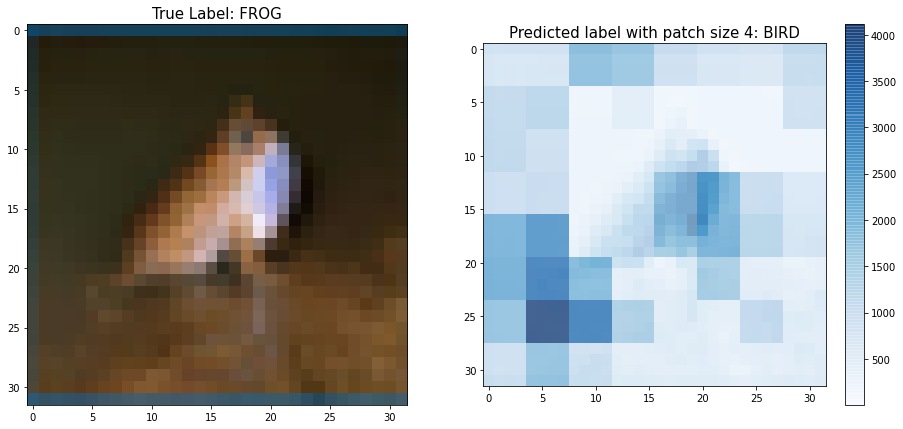

<Figure size 800x600 with 0 Axes>

Found 50 validated image filenames belonging to 10 classes.


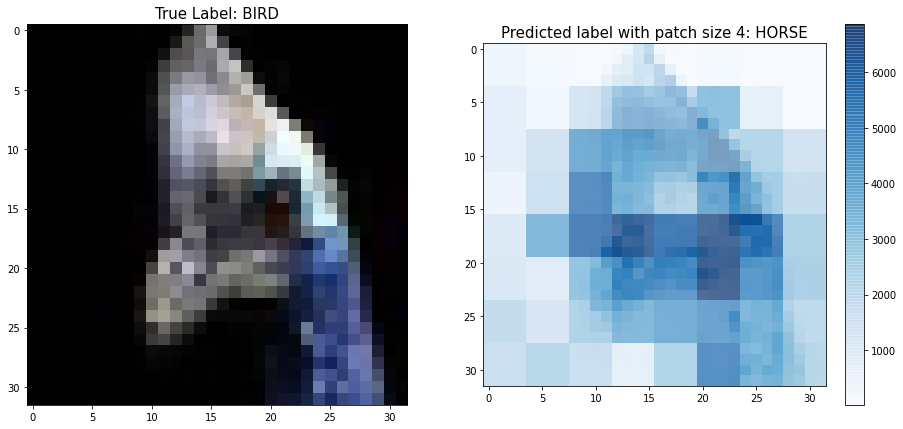

<Figure size 800x600 with 0 Axes>

Found 50 validated image filenames belonging to 10 classes.


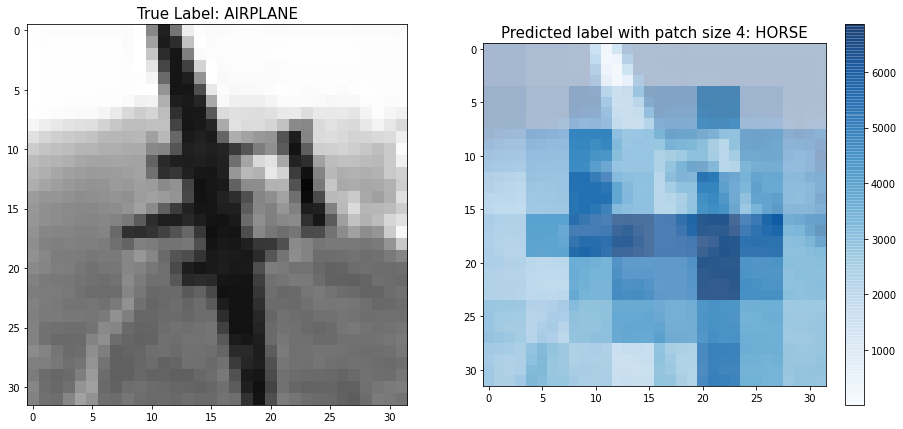

<Figure size 800x600 with 0 Axes>

In [9]:
occlusion(model,10)
occlusion(model,12)
occlusion(model,35)

In [ ]:
###edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'B'

Found 50 validated image filenames belonging to 10 classes.


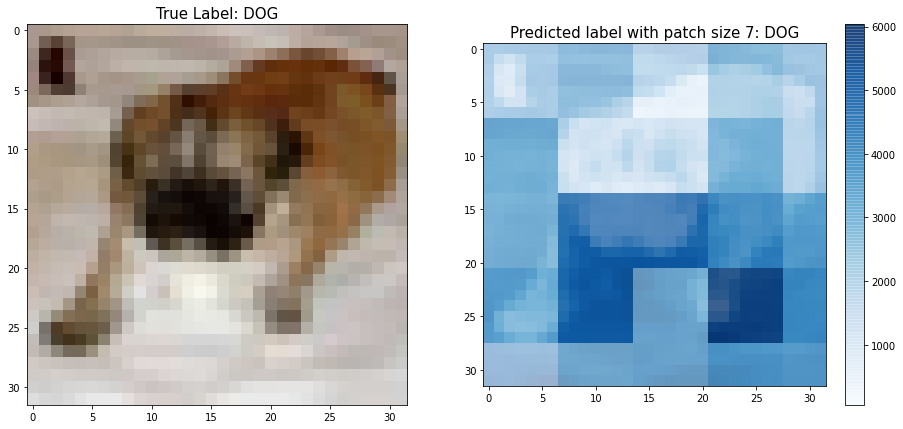

<Figure size 800x600 with 0 Axes>

In [11]:
# Call the helper function occlusion with 
# the trained model, a valid image number within 50, occlusion 
# patch size
img_num = 20
patch_size = 7

occlusion(model, img_num , patch_size)

### ⏸ Call the `occlusion` function (below) with images 1, 15 and 30. What do you observe based on the plots?

Found 50 validated image filenames belonging to 10 classes.


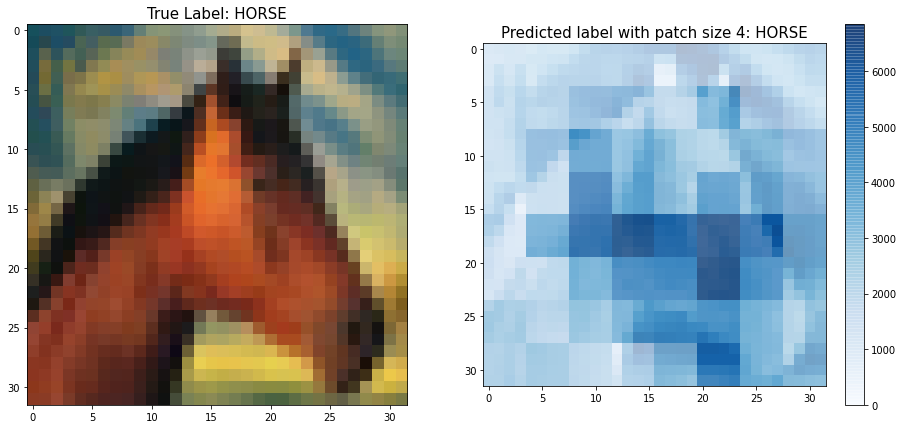

<Figure size 800x600 with 0 Axes>

Found 50 validated image filenames belonging to 10 classes.


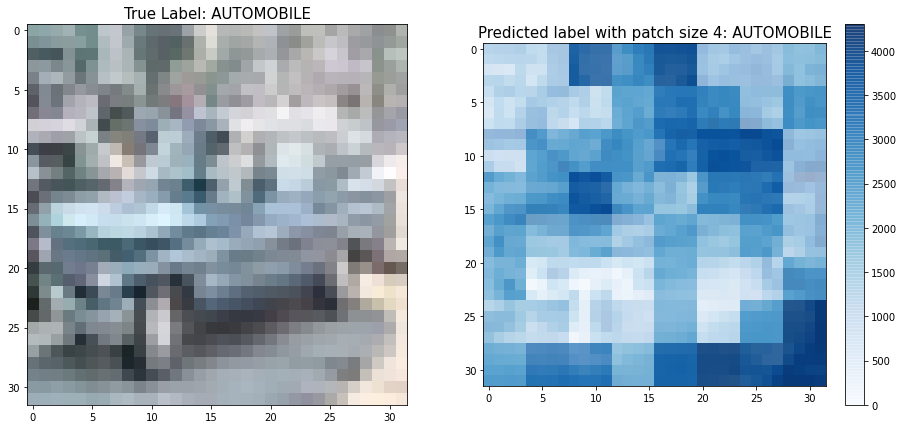

<Figure size 800x600 with 0 Axes>

Found 50 validated image filenames belonging to 10 classes.


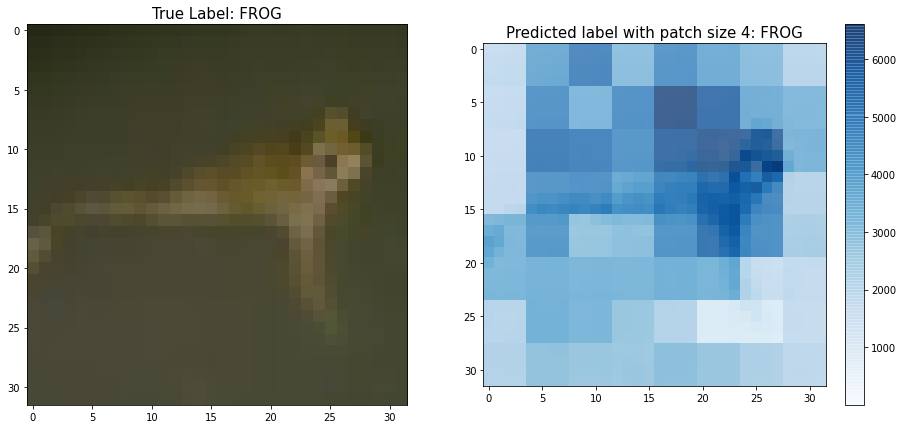

<Figure size 800x600 with 0 Axes>

In [12]:
occlusion(model,1)
occlusion(model,15)
occlusion(model,30)

In [ ]:
###edTest(test_chow2) ###

# Type your answer here 
answer2 = 'For some of the inputs, the model learn to rely on the background to classify the object'

Found 50 validated image filenames belonging to 10 classes.


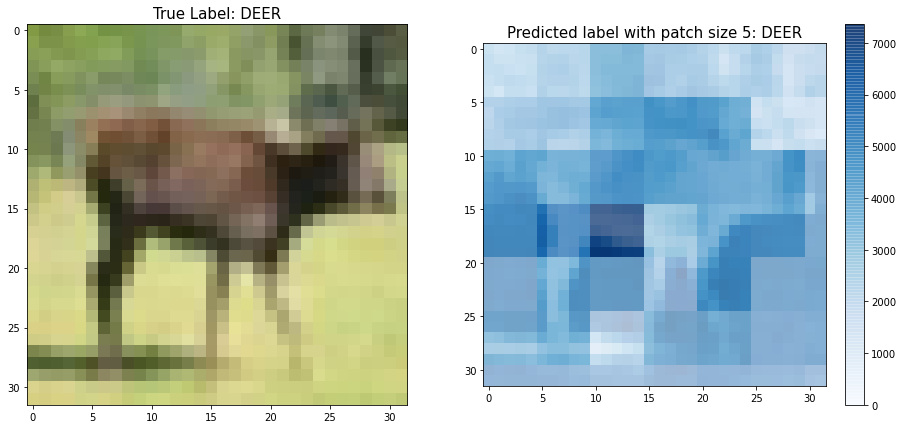

<Figure size 800x600 with 0 Axes>

In [14]:
# Call the helper function occlusion with 
# the trained model, a valid image number within 50, occlusion 
# patch size
img_num = 31
patch_size = 5

occlusion(model, img_num , patch_size)